 # Assignment: Network Analysis and Visualization

#### 1. Install libraries: igraph and py4cytoscape

In [ ]:
pip install python-igraph==0.10.8

# Warning: you have to install the version of igraph which fit the requirement of py4cytoscape

In [ ]:
pip install igraph requests pandas networkx colorbrewer chardet decorator backoff colour

In [ ]:
pip install py4cytoscape

#### 2. Generate a random network with 200 nodes

In [56]:
import py4cytoscape as p4c
import igraph as ig
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# G(N, p) Model: Each pair of N labeled nodes is connected with probability p
# Create an Erdos-Renyi random graph

g1 = ig.Graph.Erdos_Renyi(n=200, p=0.2)

#### 3. From igraph to cytoscape

In [18]:
# Since cytoscape only can obtain dataframe from igraph, we have to convert graph to dataframe at first

# Get edge information from graph
edge_list = g1.get_edgelist()

# Create a dataframe with three columns, node_ID, source and target
df_edges = pd.DataFrame(edge_list, columns=['source', 'target'])
df_nodes = pd.DataFrame(list(range(200)), columns=['name'])

# Translate igraph network into cytoscape network
g1_cy = ig.Graph.DataFrame(df_edges, directed=False, vertices=df_nodes)

#### 4. Start cytoscape

#### 5. Visualization of the network in cytoscape

In [21]:
# Create the network from igraph dataframe

p4c.create_network_from_igraph(g1_cy, "Network")

Applying default style...
Applying preferred layout


21217

In [9]:
# Change the node size to make the plot better

p4c.set_node_size_default(30)

style_name not specified, so updating "default" style.
style_name not specified, so updating "default" style.


''

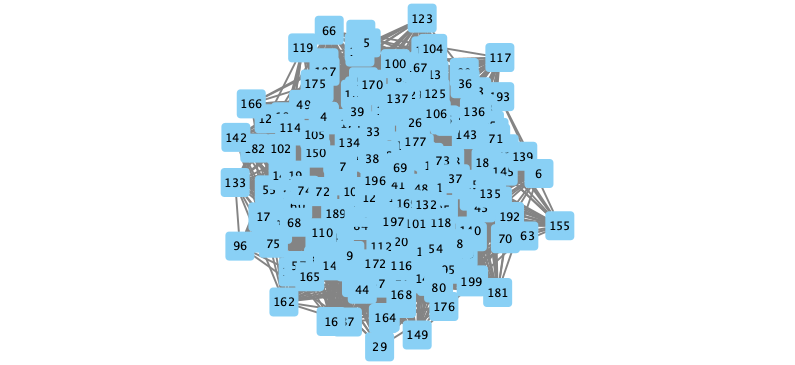

In [22]:
# Show the network

p4c.notebook_export_show_image()

In [38]:
# Check if the network has multiple subnetwork

g1_components = g1.components()
len(g1_components)

# if the result is 1, the netwwork is single, otherwise it has more than one 

1

In [23]:
# Get the highest degree of the network

g1.maxdegree()

62

In [24]:
# Try to filter some nodes to make the network clear, then generate as a subnetwork


p4c.create_degree_filter('degree filter', [0, 61], predicate='IS_NOT_BETWEEN')
p4c.create_subnetwork(subnetwork_name='HighDegree')

No edges selected.


42000

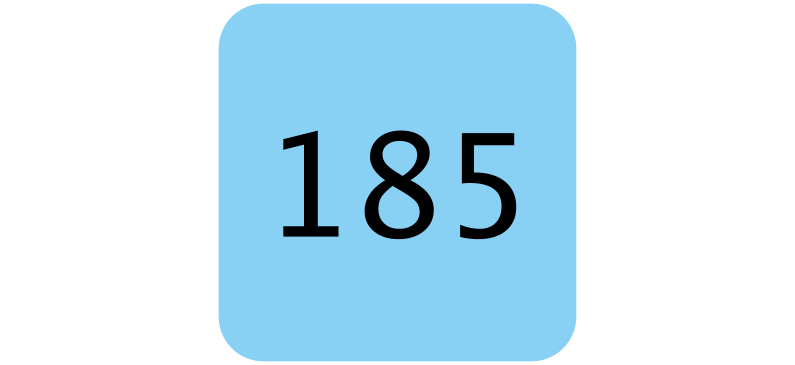

In [25]:
# Show the subnetwork

p4c.notebook_export_show_image()

#### 6. Basic Network Analysis: Betweenness

In [28]:
# In biological networks, often the most insightful properties come from the largest connected component(s)

# Betweenness centrality is a measure of centrality in a graph based on shortest paths.
# The betweenness centrality for each vertex is the number of these shortest paths that pass through the vertex.

# Get the node which has the highest betweenness
max(enumerate(g1.betweenness()), key=lambda x: x[1])

(185, 197.7264741929987)

#### 7. Basic Network Analysis: Network density

In [39]:
# Higher density indicates higher associations in the network, which implies lower resilience to changes

g1.density()

0.19824120603015077

In [ ]:
'''
The average path gives a measure of network navigability

This is a property seen in random networks where the mean path length
 for a network of size N
Scale-free networks show ultra-small world:
l(G) ≈ logN
l(G) ≈ log(logN)

In [ ]:
'''
Centrality

#### 8. Basic Network Analysis: Degree distribution

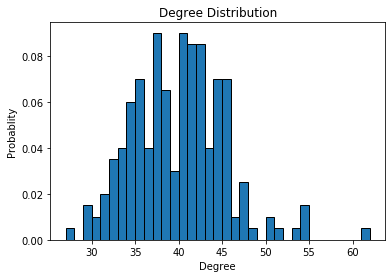

In [72]:
# Extract degree information of the network
degrees = g1.degree()

# Plot the degree distribution as a histogram
plt.hist(degrees, bins=range(min(degrees), max(degrees) + 1), edgecolor='black', density=True)
plt.xlabel("Degree")
plt.ylabel("Probablity")
plt.title("Degree Distribution")
plt.show()